In [2]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in ./.local/lib/python3.8/site-packages (0.24.1)
Note: you may need to restart the kernel to use updated packages.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
from mpl_toolkits import mplot3d
import matplotlib

from numpy import math
import seaborn as sns; sns.set()
from pandas import DataFrame
import pandas as pd

import numpy.random as rnd

import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from scipy.optimize import curve_fit

import sklearn

from sklearn.model_selection import train_test_split, validation_curve, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import max_error
from sklearn.metrics import classification_report
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

from random import randint
from numpy import pi
from random import random
import numpy.polynomial.polynomial as poly
import Harmonic_functions_and_waveform as hf
import joblib
from joblib import dump, load

from sklearn.linear_model import LinearRegression

from IPython.display import Audio
sound_file = './gameboy_sound.wav'

import pickle

In [2]:
# source /cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/bin/activate igwn-py38

## Training Data import

In [3]:
Newtraining2000V3 = pd.read_csv("FinalTrain_V3.csv",sep=',')

## Real Data

In [4]:
NoiseData = pd.read_csv("RealData_JustNoise.csv",sep=',')

sig_noiseV1 = pd.read_csv("RealData_V4_0.2.csv",sep=',')
sig_noiseV2 = pd.read_csv("RealData_V5_0.4.csv",sep=',')
sig_noiseV3 = pd.read_csv("RealData_V6_0.6.csv",sep=',')
sig_noiseV4 = pd.read_csv("RealData_V7_0.8.csv",sep=',')
sig_noiseV5 = pd.read_csv("RealData_V8_1.0.csv",sep=',')

## RealData_V4, RealData_V5 and RaalData_V6 are the same, just different instances with different z values to simulate signals at different distnaces.

#strong examples
data1 = pd.read_csv("RealData_1.0.csv",sep=',')
data05 = pd.read_csv("RealData_0.5.csv",sep=',')
data075 = pd.read_csv("RealData_0.75.csv",sep=',')
data1V2 = pd.read_csv("RealData_1.0V2.csv",sep=',')
data1V3 = pd.read_csv("RealData_1.0V3.csv",sep=',')

#weak examples

weakdata1 = pd.read_csv("RealDataweak_1.0.csv",sep=',')
weakdata1V2 = pd.read_csv("RealDataweak_1.0V2.csv",sep=',')


In [5]:
model = joblib.load('final_model.sav')

/home/charles.sthamer/.local/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator MLPRegressor from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


## Predict Sigma Function

In [6]:
def sigma_predict(data, layer1, layer2):
    
    X_precess = data.drop('sigma', axis=1)
    X_precess = X_precess.drop('theta', axis=1)
    X_precess = X_precess.drop('phase', axis=1)
    y_precess = data['sigma']
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_precess, y_precess,
                                                random_state=47, train_size = 0.8)
    sqroot = Xtest['square root']
    mean   = Xtest['mean']
    
    Xtrain = Xtrain.drop('square root', axis=1)
    Xtrain = Xtrain.drop('mean', axis=1)
    
    Xtest  = Xtest.drop('square root', axis=1)
    Xtest  = Xtest.drop('mean', axis=1)
    
    model  = MLPRegressor(hidden_layer_sizes = (layer1, layer2), max_iter=2000, learning_rate_init = 0.01, warm_start=False)
    
    model.fit(Xtrain, ytrain)      
    y_model = model.predict(Xtest)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, y_model))
    print('Mean Squared Error:', metrics.mean_squared_error(ytest, y_model))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, y_model)))
    
    #plt.plot(model.loss_curve_)
    
    matplotlib.rc('xtick', labelsize=20) 
    matplotlib.rc('ytick', labelsize=20)
    
    plt.figure(figsize=(15,10))
    plt.scatter(ytest, y_model, c = 'black')
    plt.plot(ytest, ytest, c = 'yellow', label = 'Actual vs actual', linewidth = 3)
    #plt.scatter(ytest, mean, c = 'blue')
    #plt.scatter(ytest, sqroot, c = 'orange')
    plt.xlabel('Actual', size=25)
    plt.ylabel('Predicted', size=25)
    plt.title('Predicting Sigma', size = 25)
    
    #x = ytest
    #y = y_model
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'magenta', label = 'Line of best fit for predicted sigma', linewidth = 3)
    
    #x = ytest
    #y = sqroot
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b,c = 'red', label = 'Line of best fit for quadrature sum (L2 norm)', linewidth = 3)
    
    #x = ytest
    #y = mean
    #m, b = np.polyfit(x, y, 1)
    #plt.plot(x, m*x + b, c = 'green', label = 'Line of best fit for mean of SNRs', linewidth = 3)
    
    plt.legend(fontsize = 22)
    
    return model, ytest, y_model

Mean Absolute Error: 0.023984267747690458
Mean Squared Error: 0.02155019765235521
Root Mean Squared Error: 0.14679985576408178


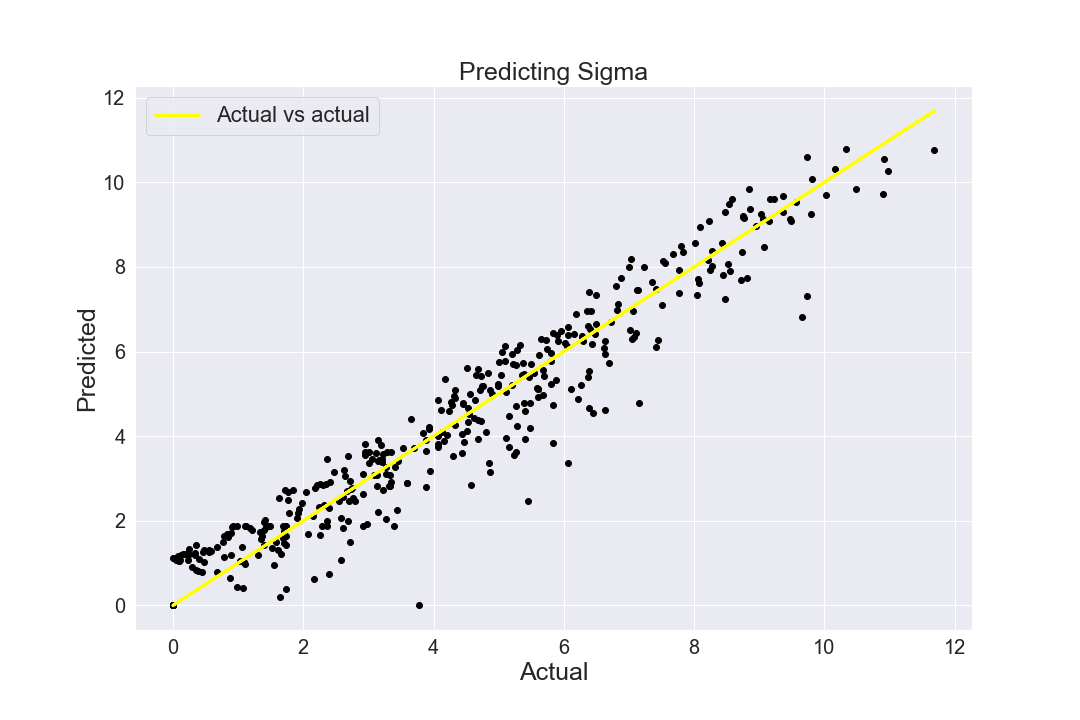

In [46]:
model_small, ytestsmall, ymodelsmall = sigma_predict(Newtraining2000V3, 3, 2)

In [47]:
from sklearn.metrics import r2_score

r2 = r2_score(ytestsmall, ymodelsmall, sample_weight=None)
r2

0.9770960533399847

Mean Absolute Error: 0.010905899111356187
Mean Squared Error: 0.0031536555626359786
Root Mean Squared Error: 0.056157417699142634


0.9966482368303113

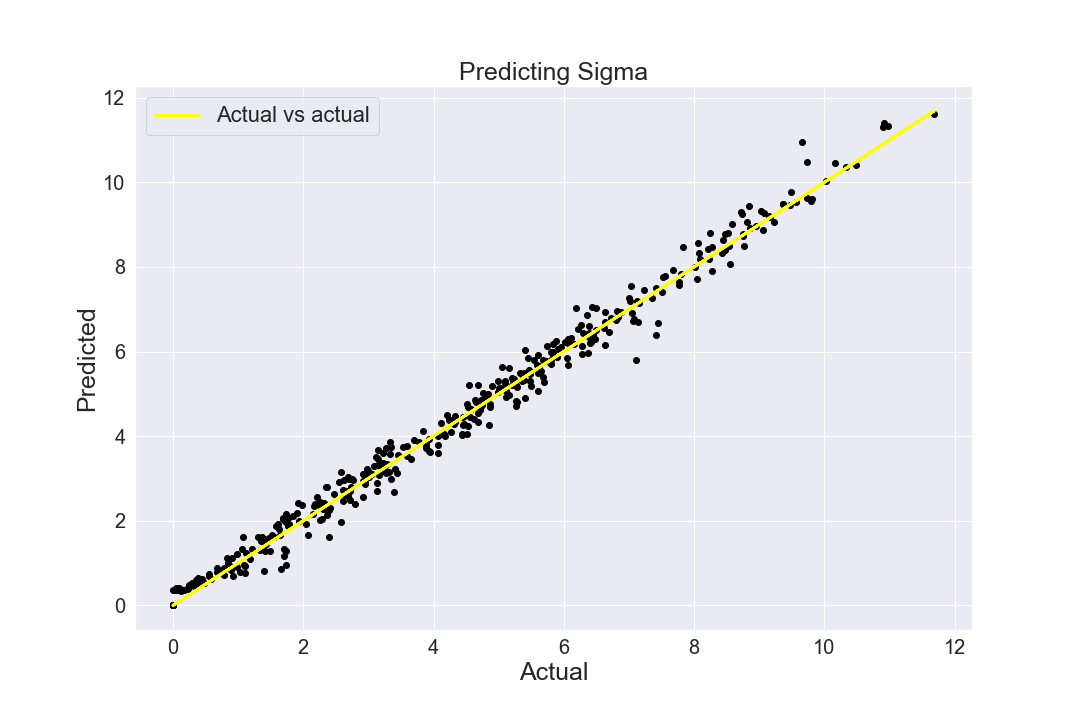

In [48]:
model_V300, ytestV300, ymodelV300 = sigma_predict(Newtraining2000V3, 300, 60)

from sklearn.metrics import r2_score

r2 = r2_score(ytestV300, ymodelV300, sample_weight=None)
r2

In [ ]:
model_V600, ytestV600, ymodelV600 = sigma_predict(Newtraining2000V3, 600, 96)

from sklearn.metrics import r2_score

r2 = r2_score(ytestV600, ymodelV600, sample_weight=None)
r2

Mean Absolute Error: 0.006793982371159349
Mean Squared Error: 0.0018728947674252886
Root Mean Squared Error: 0.04327695422999739


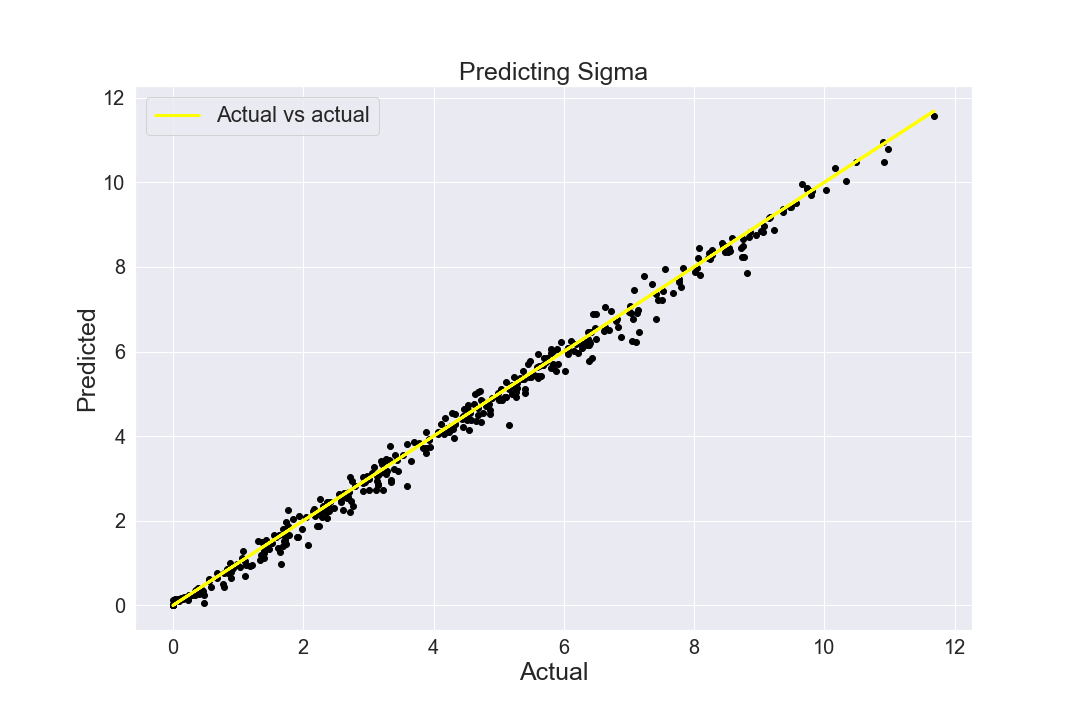

In [21]:
model_V3, ytestV3, ymodelV3 = sigma_predict(Newtraining2000V3, 650, 125)

In [83]:
joblib.dump(model_V3, 'final_model.sav')

['final_model.sav']

In [5]:
model = joblib.load('final_model.sav')

## Strong configuration of signal

In [ ]:
# theta = 2.54 
# psi = 2.12 
# alpah0 = 4.33 
# phase = 0.46

#sigma = 10.64

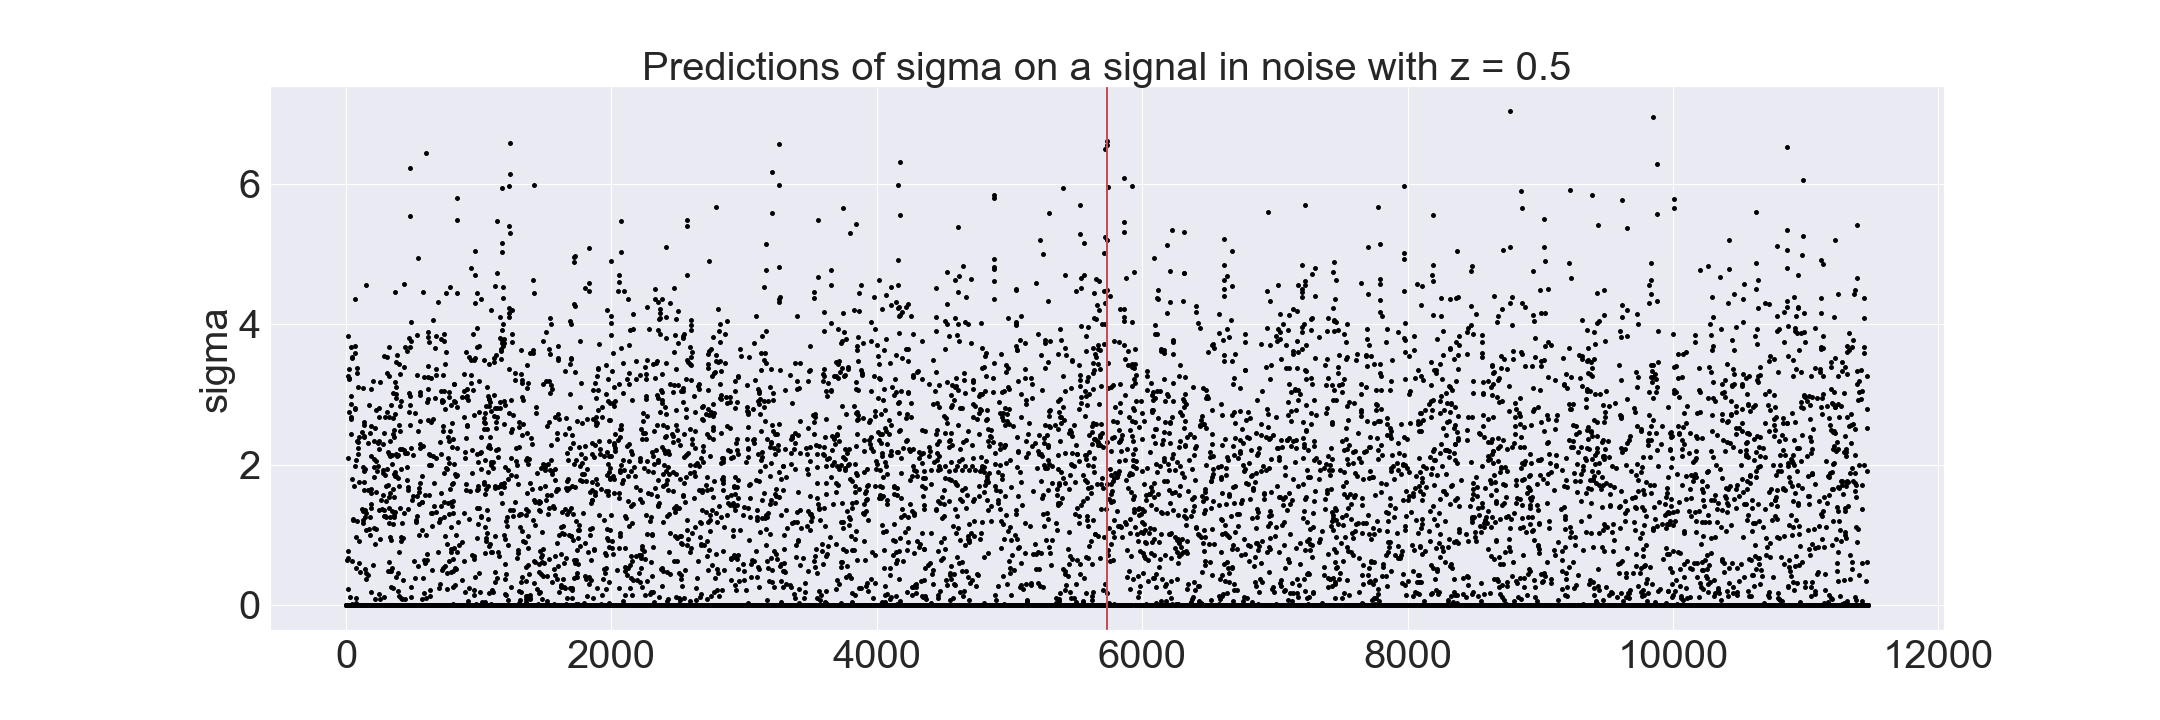

In [40]:
predic_signalV4 = model.predict(data05)

#plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4, s = 15, c = 'black')

plt.ylabel('sigma', fontsize = 40)
plt.ylabel('sigma', fontsize = 40)
plt.title('Predictions of sigma on a signal in noise with z = 0.5', fontsize = 40)

plt.axvline(x=len(predic_signalV4)/2, color='r', linestyle='-', linewidth = 2)

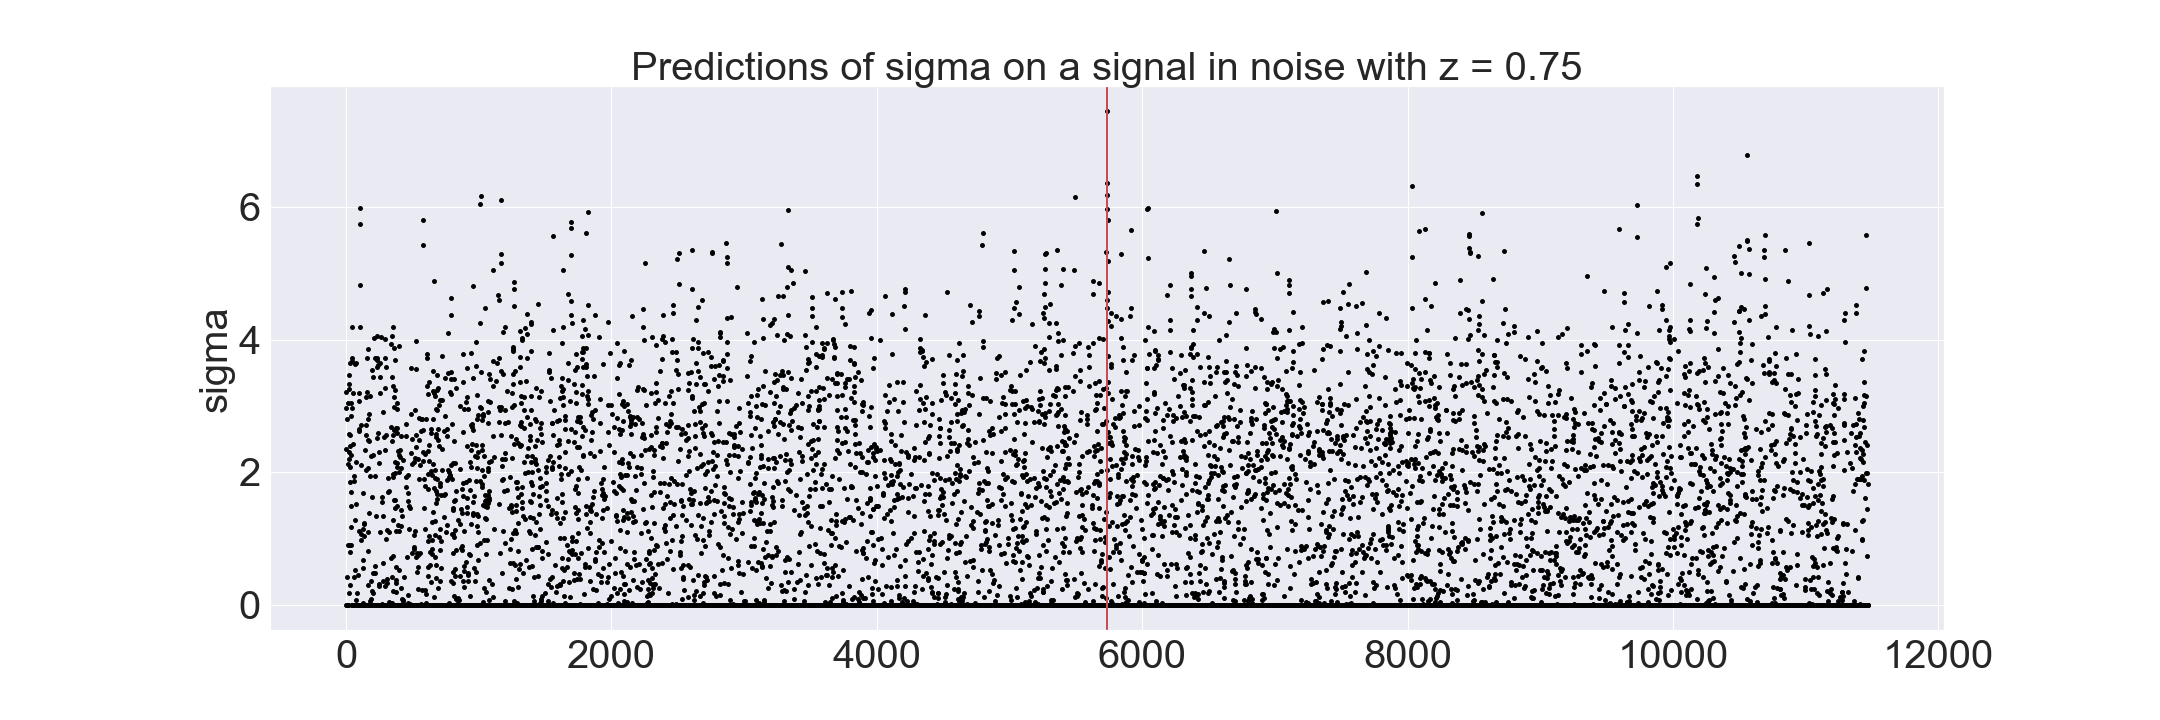

In [36]:
predic_signalV4 = model.predict(data075)

#plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4, s = 15, c = 'black')

plt.ylabel('sigma', fontsize = 40)
plt.title('Predictions of sigma on a signal in noise with z = 0.75', fontsize = 40)
plt.axvline(x=len(predic_signalV4)/2, color='r', linestyle='-', linewidth = 2)

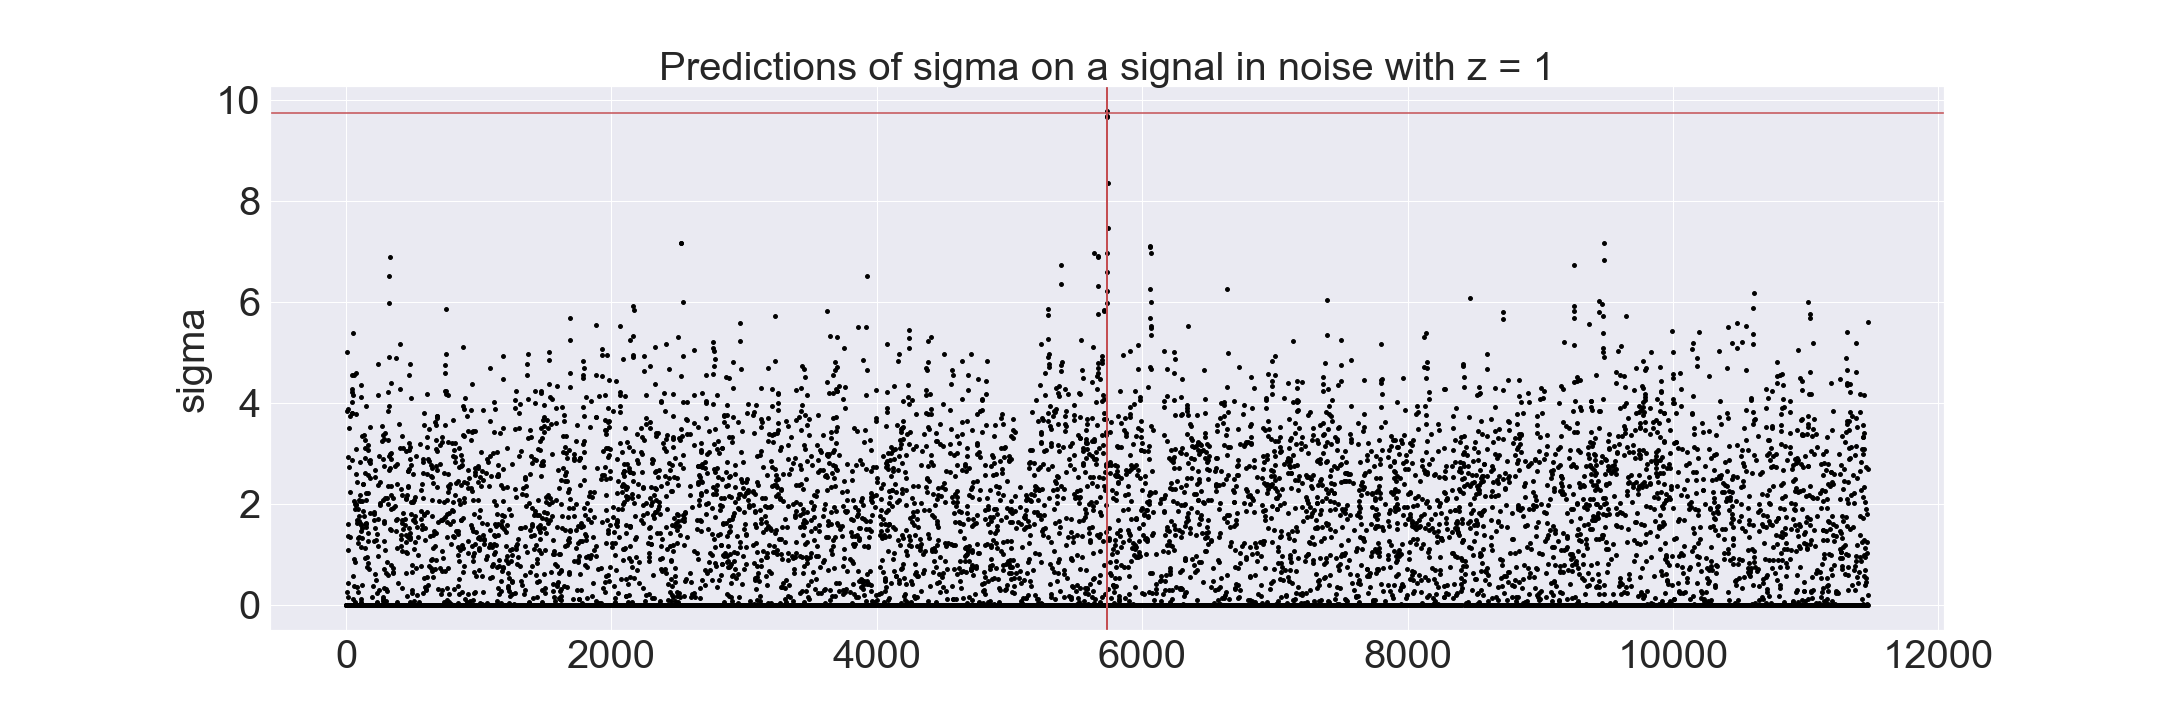

In [44]:
predic_signalV4 = model.predict(data1)

#plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4, s = 15, c = 'black')

plt.ylabel('sigma', fontsize = 40)
plt.title('Predictions of sigma on a signal in noise with z = 1', fontsize = 40)
plt.axvline(x=len(predic_signalV4)/2, color='r', linestyle='-', linewidth = 2)

plt.axhline(y=9.75, color='r', linestyle='-')

In [31]:
type(predic_signalV4)

numpy.ndarray

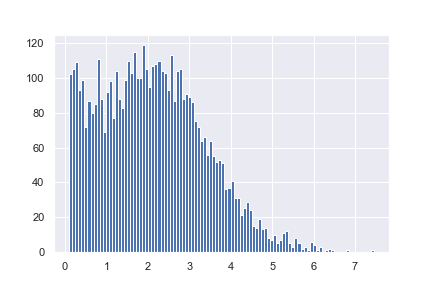

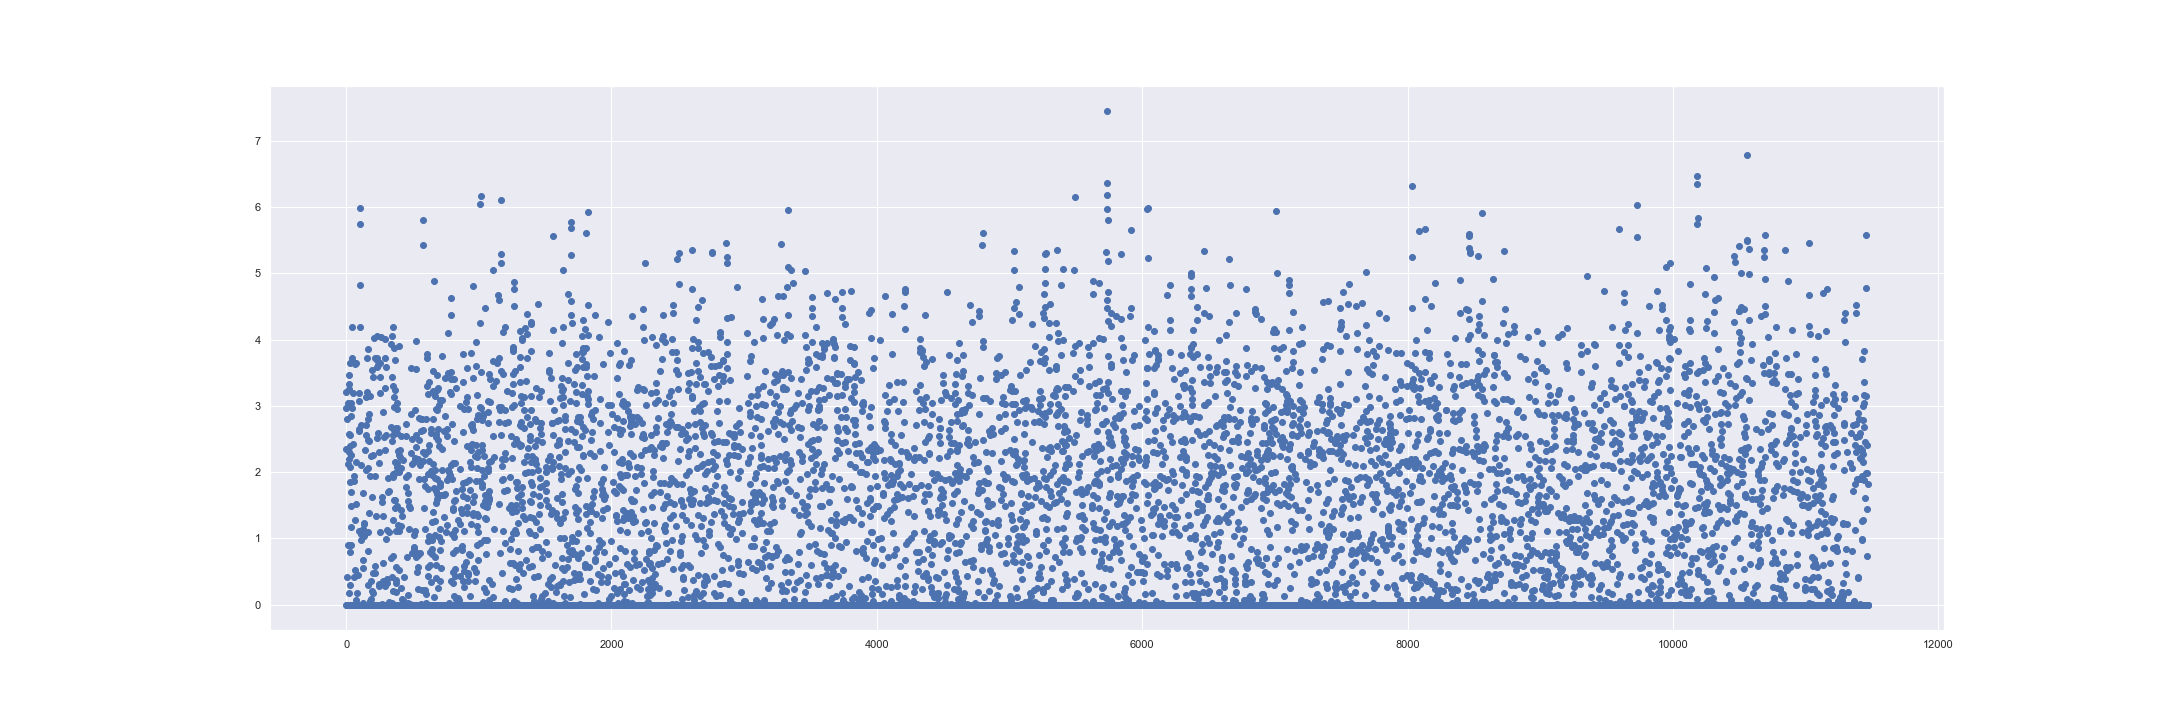

In [87]:
predic_signalV4 = model.predict(data075)

plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4)

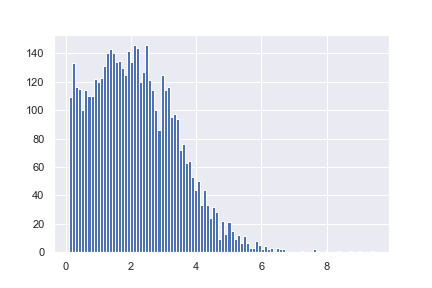

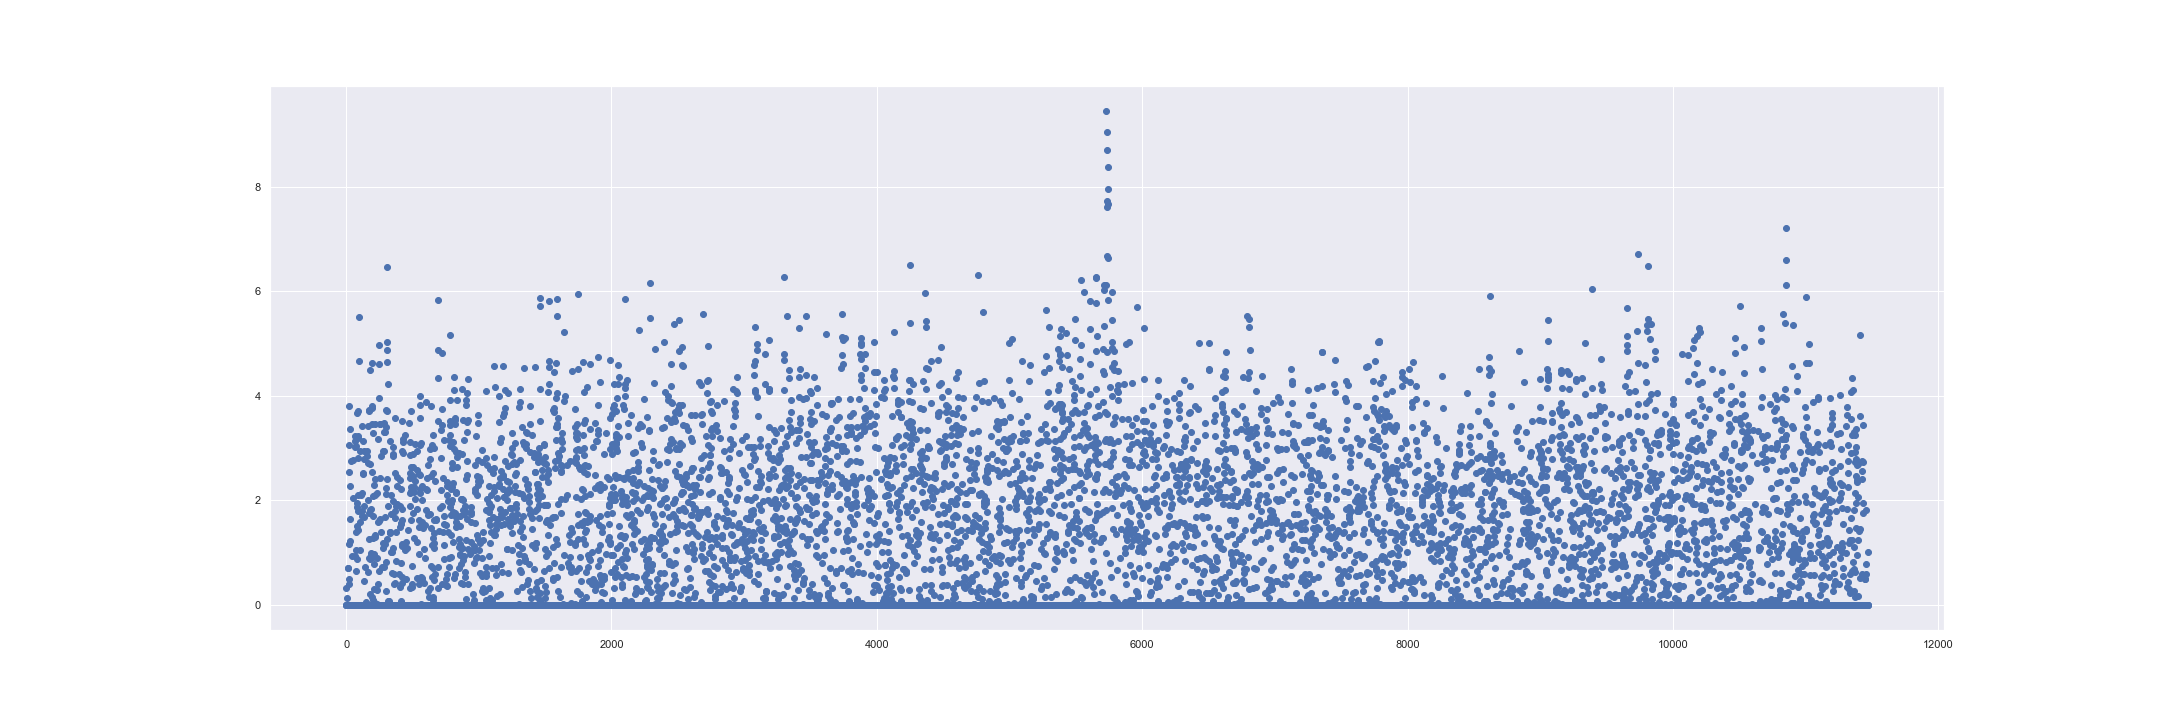

In [88]:
predic_signalV5 = model.predict(data1)

plt.hist(predic_signalV5[predic_signalV5>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV5),len(predic_signalV5)), predic_signalV5)

In [ ]:
#theta = 0.7145752091836897 
# psi = 1.3218596616543619 
#alpha0 = 4.702142255490095 
#phase = 5.841855753324133

#sigma = 10.205635585386876

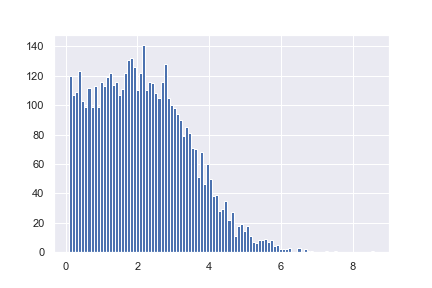

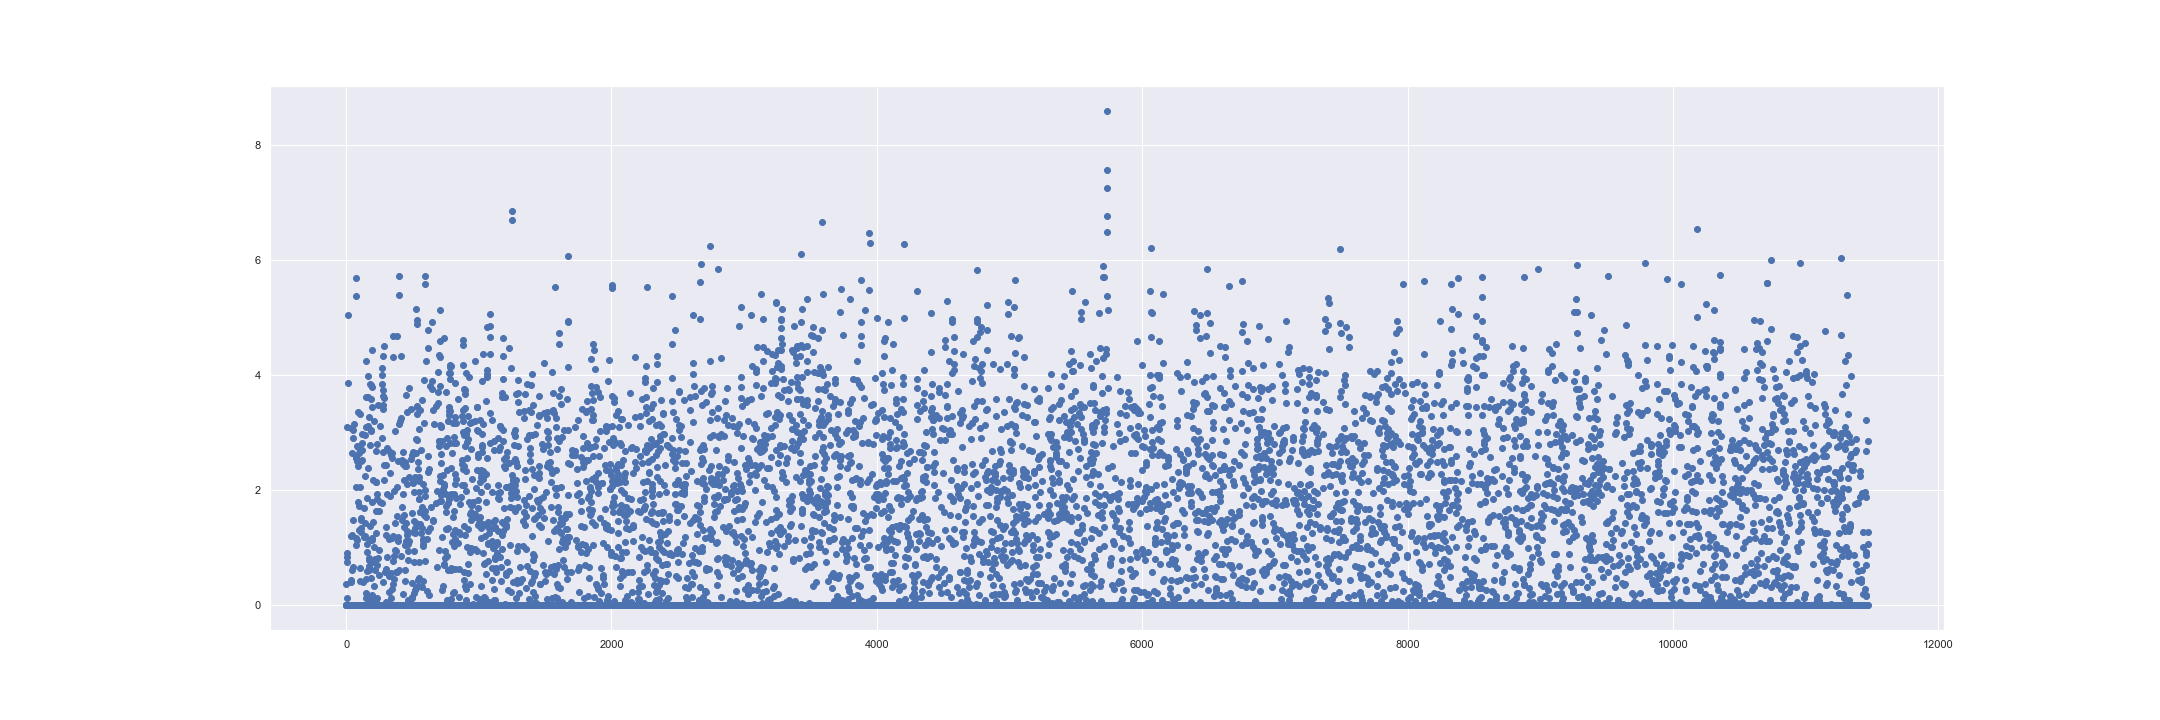

In [89]:
predic_signalV4 = model.predict(data1V2)

plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4)

In [ ]:
#theta = 2.2423074430331784 
#psi = 2.928580503207653 
#alpha0 = 6.17425815404797 
#phase = 1.1133000067687546

# sigma = 11.41

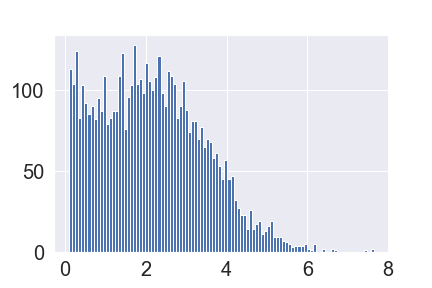

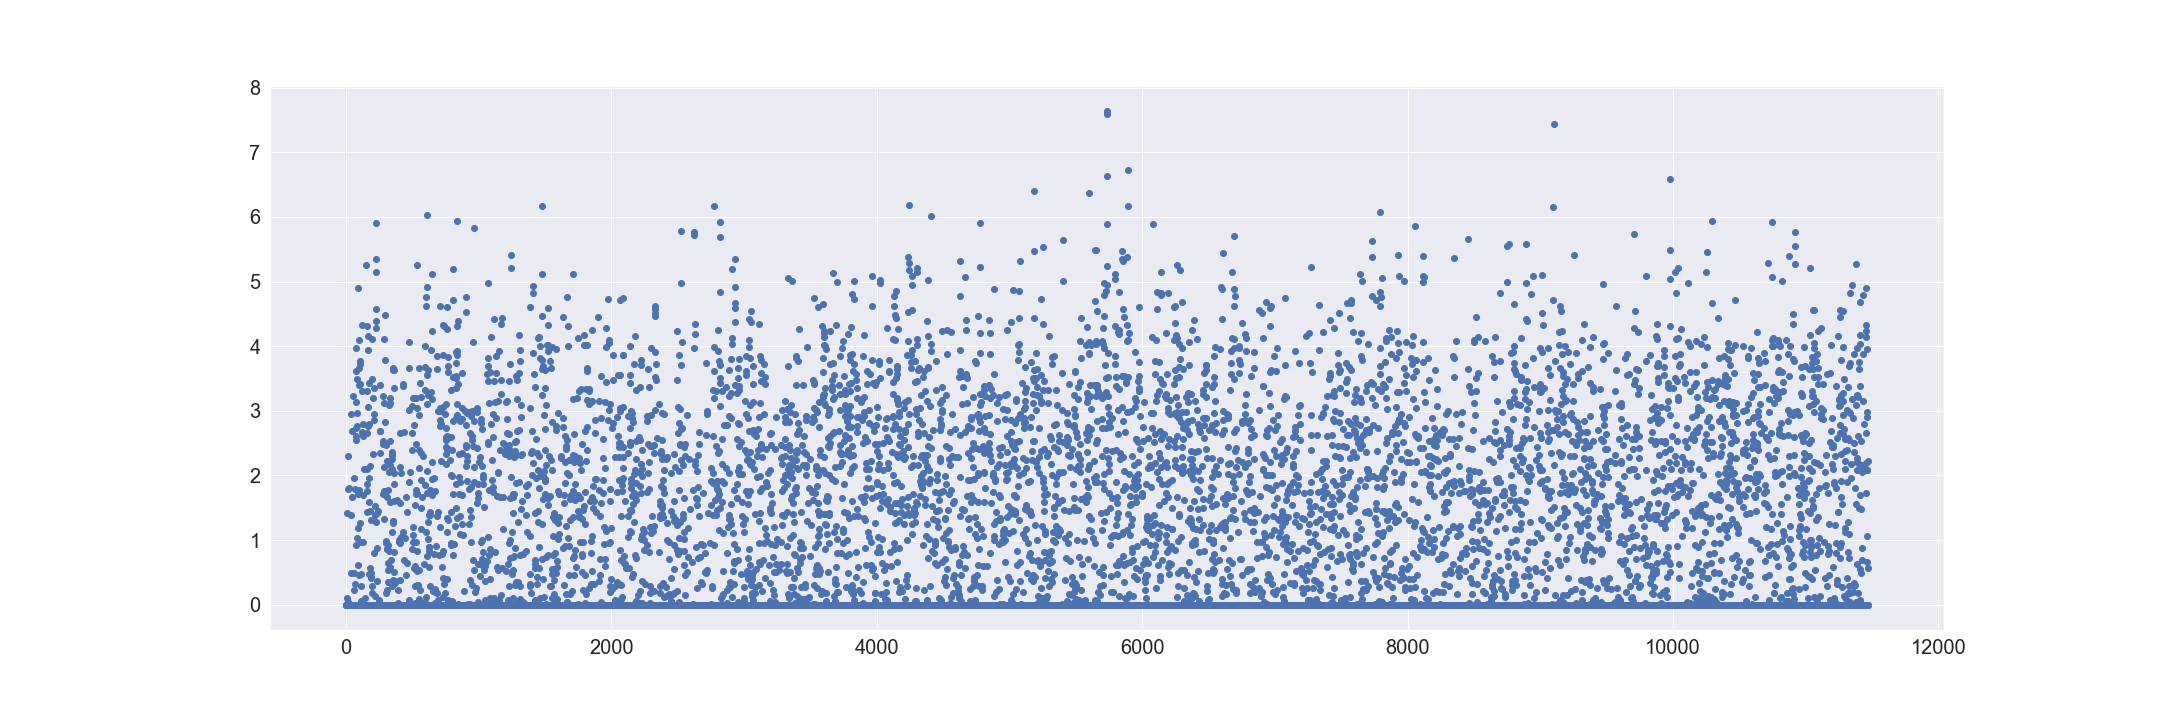

In [95]:
predic_signalV4 = model.predict(data1V3)

plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4)

## weak configuration of signal

In [ ]:
#theta = 1.715046374925977 
#psi = 1.836091917867095 
#alpha0 = 0.2560932944097968 
#phase = 1.9355215446247058

#sigma = 8.097

In [23]:
predic_signalV4 = model.predict(weakdata1)

plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4)

NotFittedError: This MLPRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [24]:
#theta = 1.1324245689336123 
#psi = 2.240864185447341 
#alpha0 = 4.959542359523246 
#phase = 5.7695194860891945

# sigma = 8.544

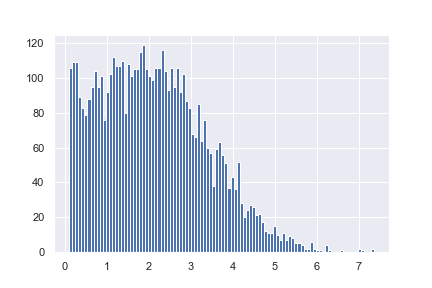

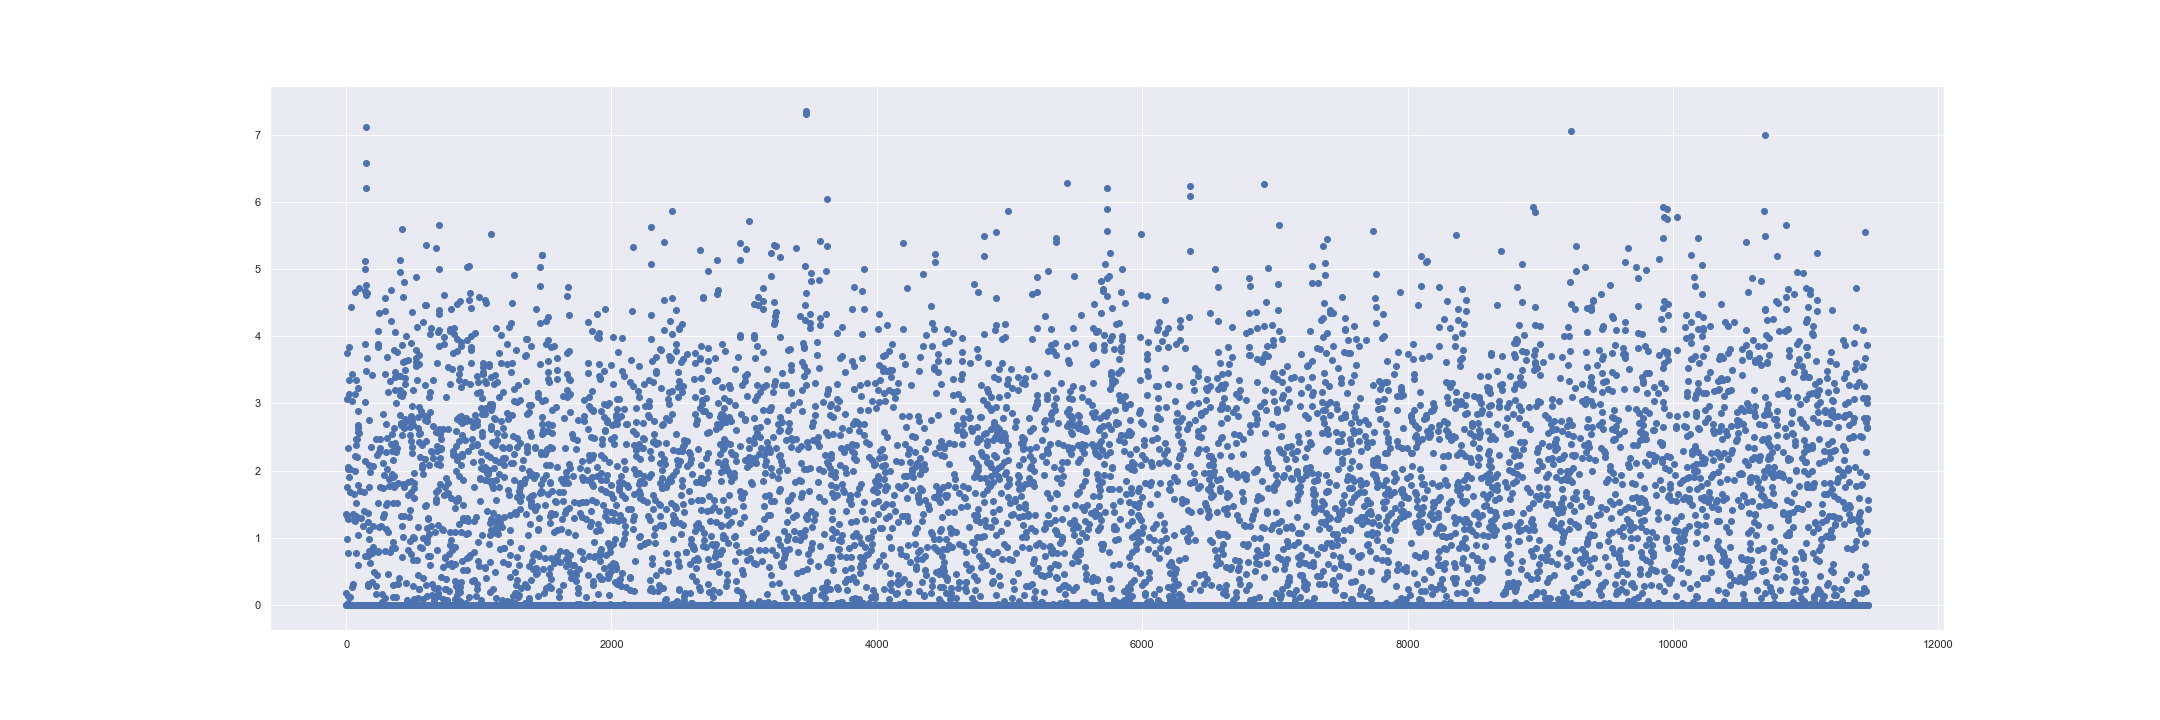

In [92]:
predic_signalV4 = model.predict(weakdata1V2)

plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4)

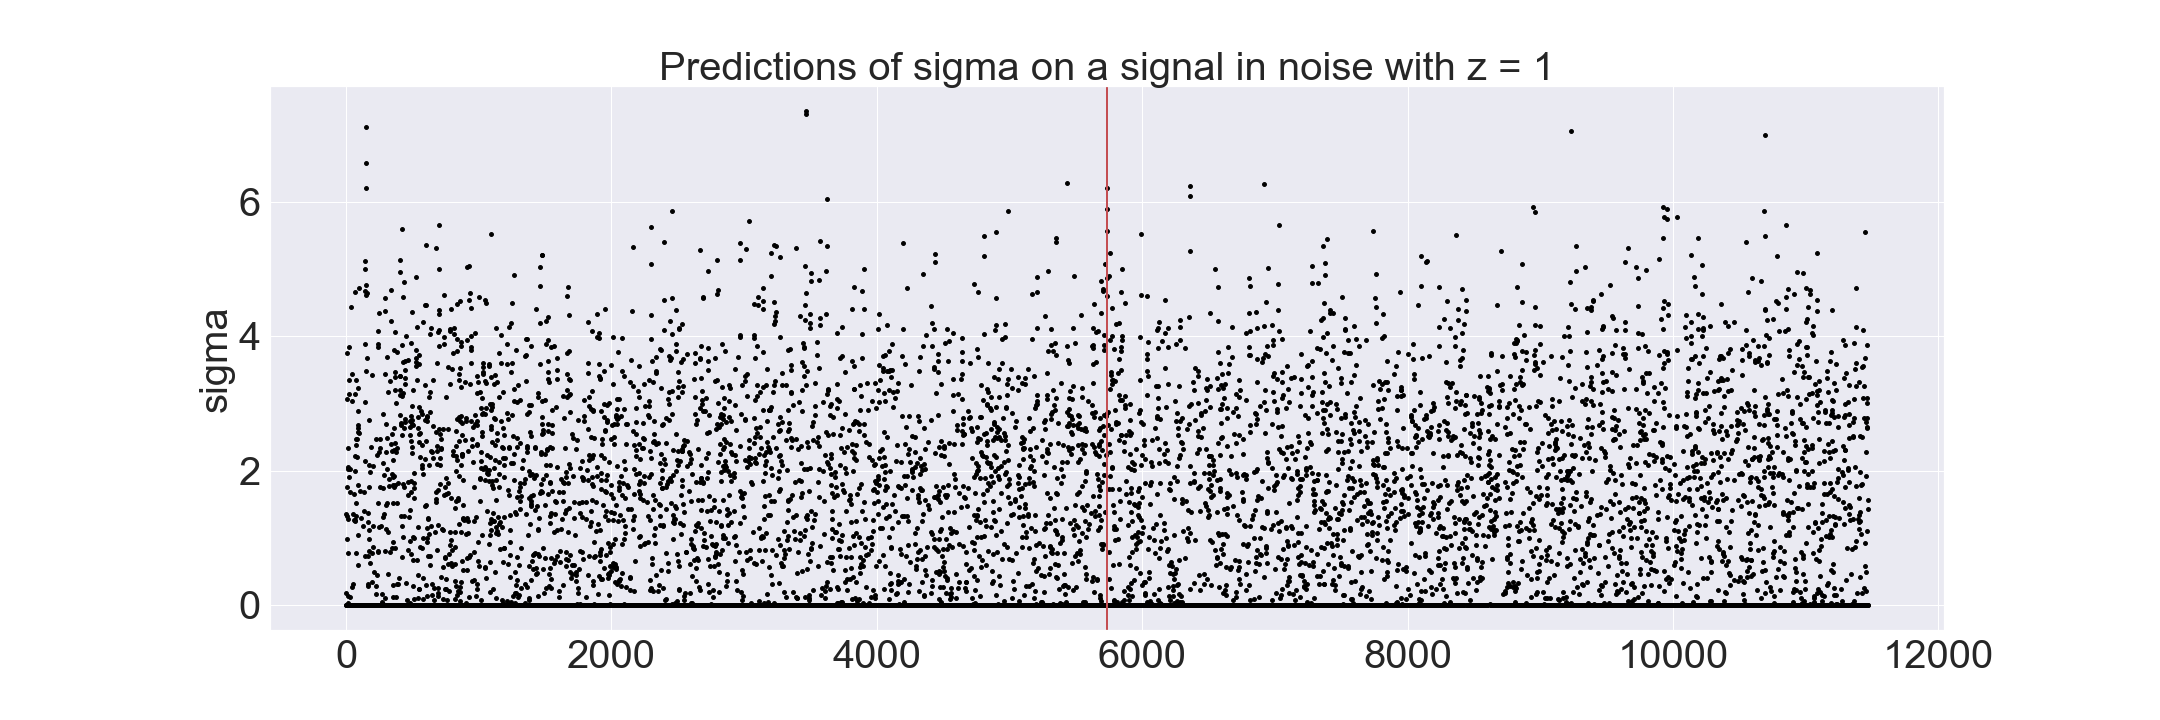

In [59]:
predic_signalV4 = model.predict(weakdata1V2)

#plt.hist(predic_signalV4[predic_signalV4>0.1], bins = 100);

plt.figure(figsize=(30,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.scatter(np.linspace(0,len(predic_signalV4),len(predic_signalV4)), predic_signalV4, s = 15, c = 'black')

plt.ylabel('sigma', fontsize = 40)
plt.title('Predictions of sigma on a signal in noise with z = 1', fontsize = 40)

plt.axvline(x=len(predic_signalV4)/2, color='r', linestyle='-', linewidth = 2)

Mean Absolute Error: 0.016224082002195755
Mean Squared Error: 0.0040663368493940675
Root Mean Squared Error: 0.06376783553951057


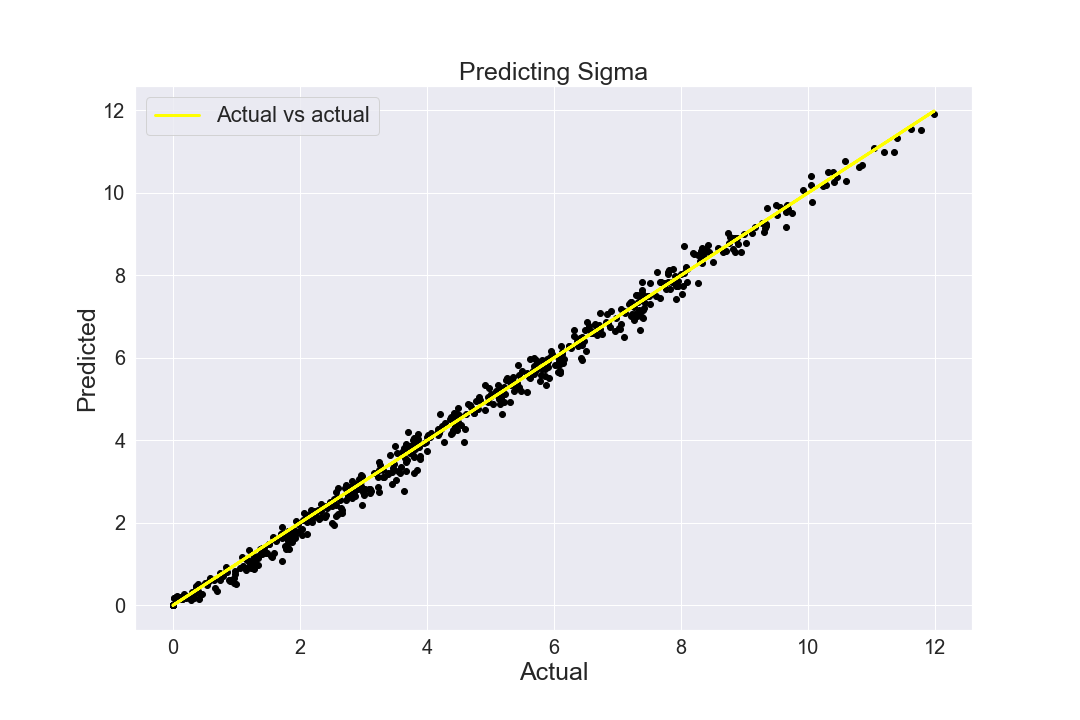

In [93]:
newmodelV3, ytest3, ymodelV3 = sigma_predict(Newtraining3000V2, 200, 32)

Mean Absolute Error: 0.018858211115583386
Mean Squared Error: 0.005370097714219886
Root Mean Squared Error: 0.07328095055483305


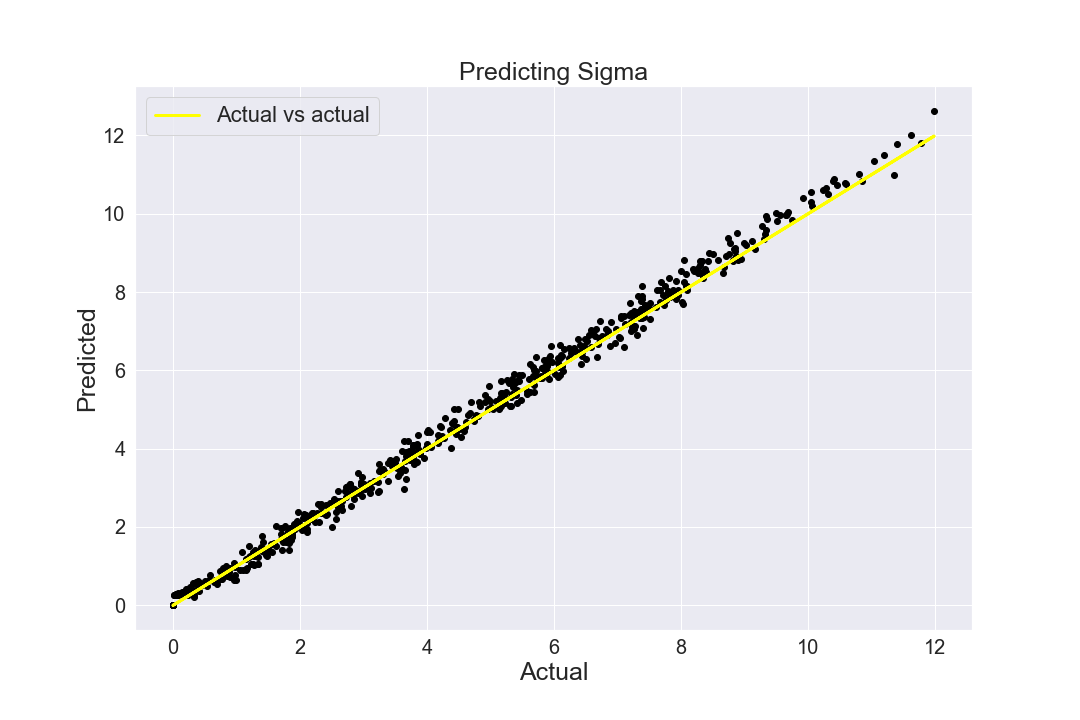

In [93]:
newmodelV3, ytest3, ymodelV3 = sigma_predict(Newtraining3000V2, 400, 32)

Mean Absolute Error: 0.01640446666824352
Mean Squared Error: 0.004117656679915032
Root Mean Squared Error: 0.06416896975887203


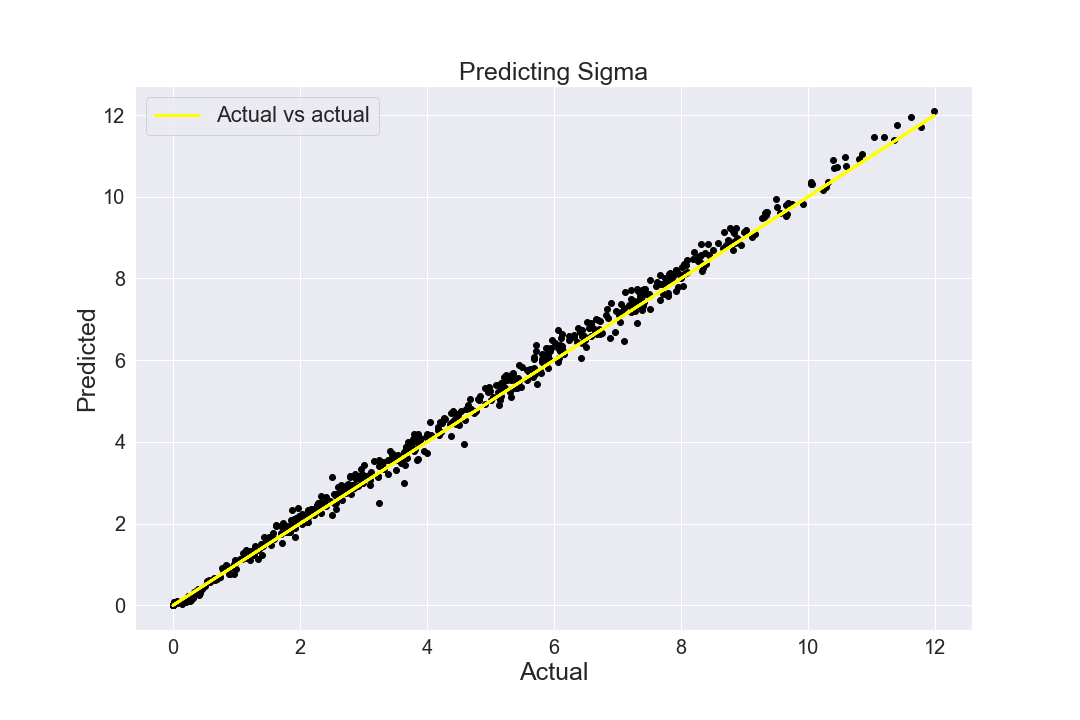

In [58]:
newmodelV2, ytest2, ymodelV2 = sigma_predict(Newtraining3000V2, 600, 96)

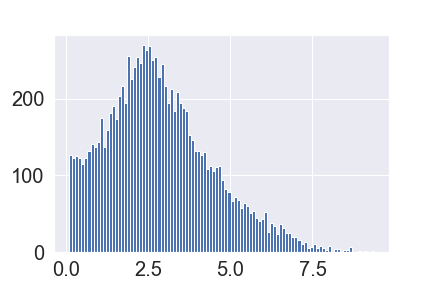

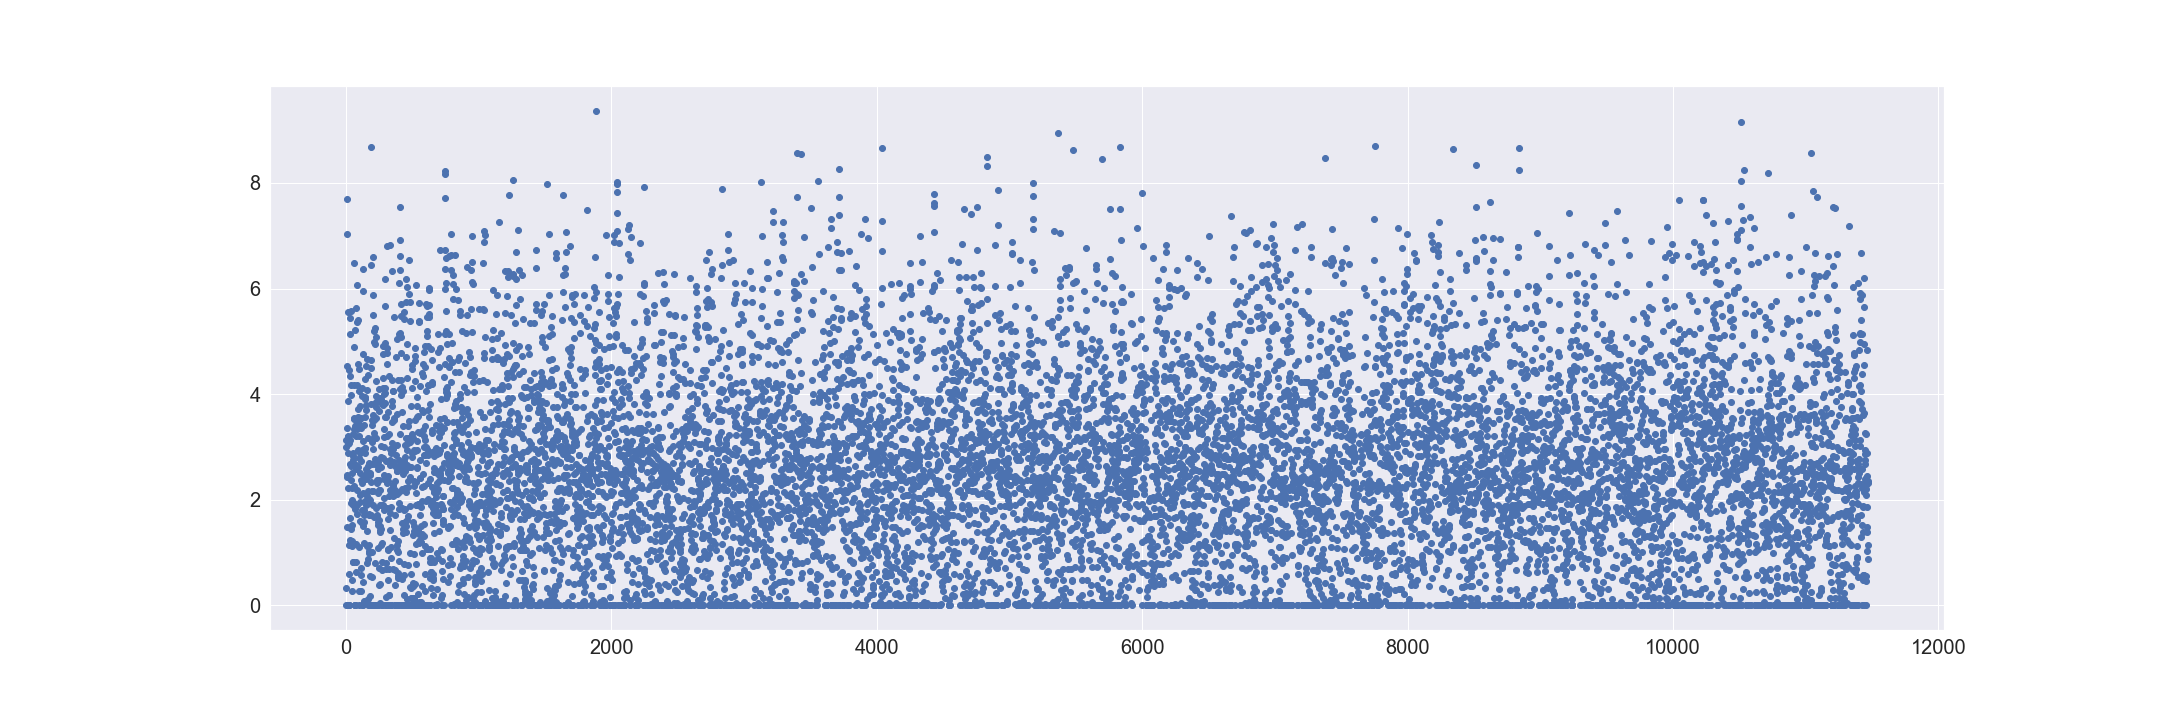

In [94]:
predic_noise = newmodelV3.predict(NoiseData)

plt.hist(predic_noise[predic_noise>0.1], bins = 100);

plt.figure(figsize=(30,10))
plt.scatter(np.linspace(0,len(predic_noise),len(predic_noise)), predic_noise)

Mean Absolute Error: 0.14352214799522098
Mean Squared Error: 0.036385497563821666
Root Mean Squared Error: 0.1907498297871368


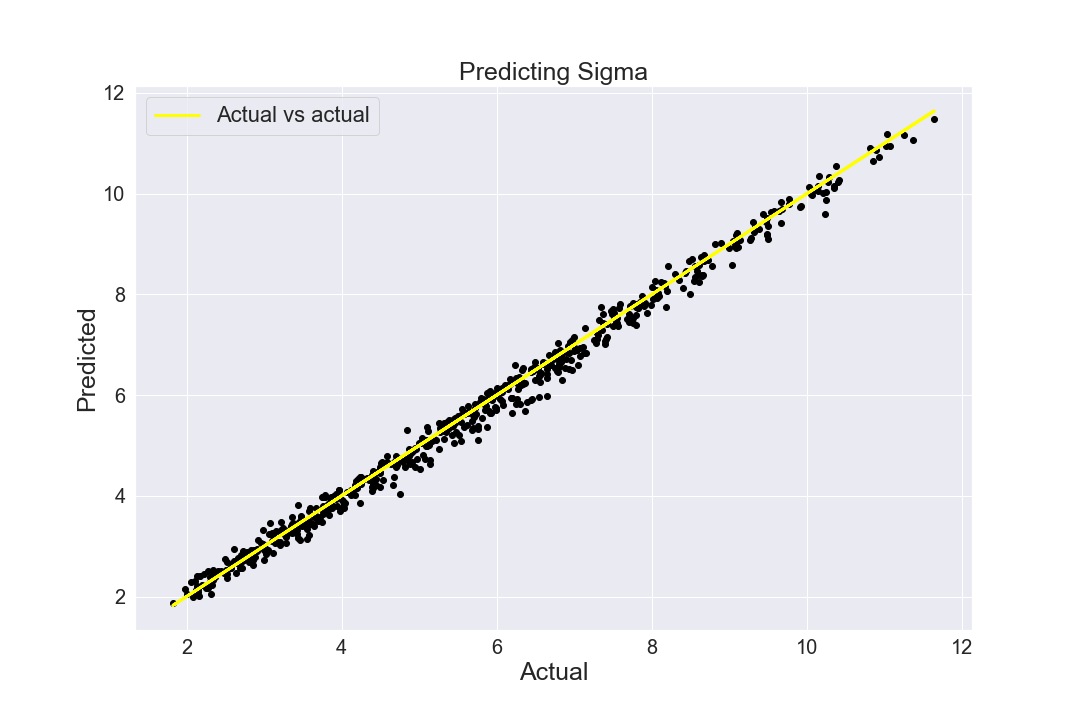

In [38]:
ymodelcentre, ytestcentre = sigma_predict(Data3000_V10centre, 1000, 96)

In [ ]:
sig_vals = []

for i in range(200):
    
    
    filename = "Data_noiseV%s.csv" %i

    data = pd.read_csv(filename,sep=',')
    
    sigma = data['sigma'][0]
    
    sig_vals.append(sigma)

In [ ]:
x = np.loadtxt("predictions_in_noise_last3000.txt")
predictions = np.array(x)

In [ ]:
plt.figure(figsize=(20,10))

plt.scatter(sig_vals, predictions, c = 'black')

x = sig_vals
x = np.array(x)
y = predictions
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, c = 'magenta', label = 'Line of best fit for predicted sigma', linewidth = 3)

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)

plt.xlabel('Actual values', fontsize = 40)
plt.ylabel('predicted values', fontsize = 40)
plt.title('Comparison of predicted sigma values in real data', fontsize = 40)

In [ ]:
plt.figure(figsize=(20,10))

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

plt.hist(y, bins = 30, color = 'deeppink', label = 'True sigma values');
plt.hist(x, bins = 30, color = 'navy', label = 'Predicted sigma values');
plt.hist(x-y, bins = 30, color = 'deepskyblue', label = 'Difference between predicted and true sigma values');

plt.ylabel('Number of occurences')

plt.xlabel('Sigma value')

plt.legend(fontsize = 20)

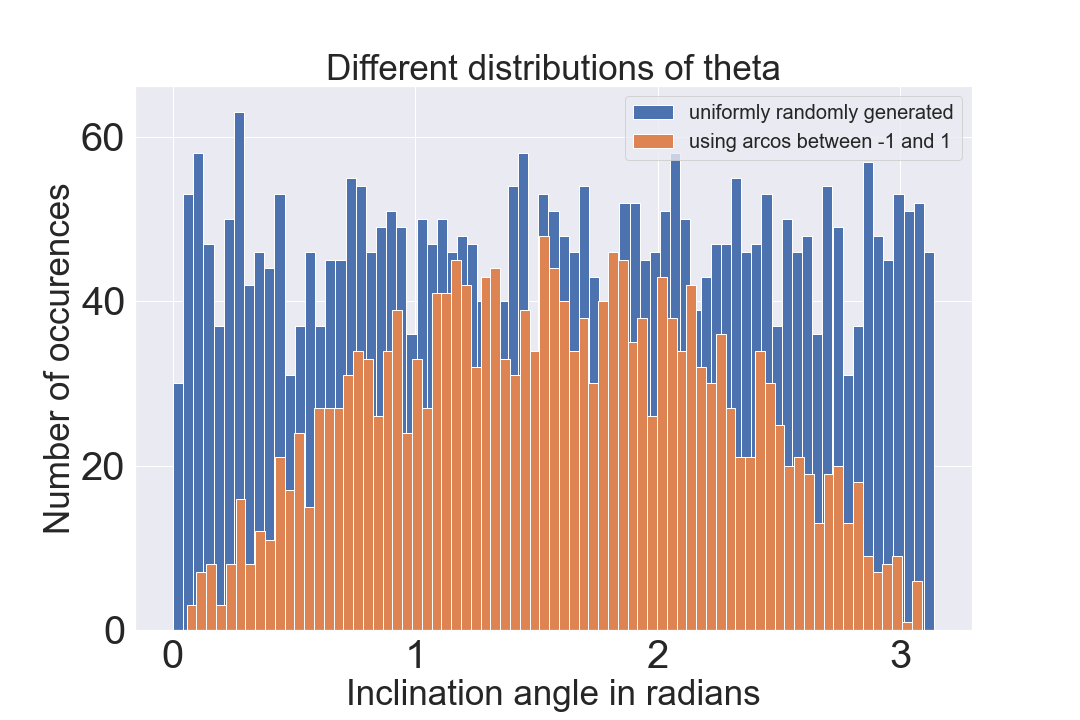

In [21]:
plt.figure(figsize = (15,10))

matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40)


plt.xlabel('Inclination angle in radians', size=35)
plt.ylabel('Number of occurences', size=35)
plt.title('Different distributions of theta', size = 35)

plt.hist(Data3500_V8['theta'], bins = 75, label = 'uniformly randomly generated');
plt.hist(Data2000_V11hm['theta'], bins = 75, label = 'using arcos between -1 and 1');

plt.legend(fontsize = 20)

# Validation/learning curves

In [3]:
Newtraining2000V3 = pd.read_csv("FinalTrain_V3.csv",sep=',')

X_precess = Newtraining2000V3.drop('sigma', axis=1)
X_precess = X_precess.drop('theta', axis=1)
X_precess = X_precess.drop('phase', axis=1)
X_precess = X_precess.drop('mean', axis=1)
X_precess = X_precess.drop('square root', axis=1)
y_precess = Newtraining2000V3['sigma']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_precess, y_precess,
                                            random_state=47, train_size = 0.8)

model  = MLPRegressor(hidden_layer_sizes = (10, 5), max_iter=2000, learning_rate_init = 0.01, warm_start=False)

train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model, Xtrain, ytrain, train_sizes=np.array([ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(30,10))

plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, test_scores_mean)

In [ ]:
sklearn.model_selection.validation_curve(estimator, X, y, *, param_name, param_range, groups=None, cv=None, scoring=None, n_jobs=None, pre_dispatch='all', verbose=0, error_score=nan, fit_params=None)

In [4]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model, Xtrain, ytrain, train_sizes=np.array([ 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]))

In [8]:
len(train_scores), len(train_scores_mean)

(10, 10)

In [11]:
type(train_scores)

numpy.ndarray

In [5]:
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

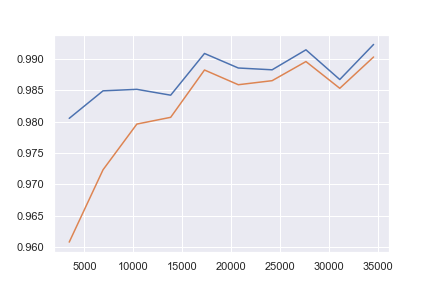

In [6]:
train_scores_mean = np.mean(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean)
plt.plot(train_sizes, test_scores_mean)

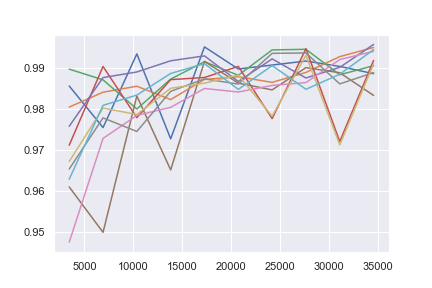

In [9]:
plt.plot(train_sizes, train_scores)
plt.plot(train_sizes, test_scores)

In [ ]:
np.savetxt('train_scores.txt', train_scores)